In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [11]:

# Load the dataset
df = pd.read_csv("C:/Users/shukl/Downloads/sports_dataset.csv")
print("Dataset loaded successfully!")

# Summary statistics
print("Dataset Summary:\n", df.describe())
print("Missing Values:\n", df.isnull().sum())


Dataset loaded successfully!
Dataset Summary:
                Age      Balance    Stability  Fine Motor Movement  \
count  1000.000000  1000.000000  1000.000000          1000.000000   
mean     26.966000     0.754602     0.732405             0.775895   
std       7.348527     0.171512     0.164989             0.183995   
min      15.000000     0.020286     0.129860             0.000000   
25%      21.000000     0.668924     0.629556             0.702985   
50%      27.000000     0.783992     0.737530             0.817476   
75%      33.250000     0.875760     0.855158             0.902024   
max      39.000000     1.000000     1.000000             1.000000   

          Strength  Bone Density  Reaction Time       Height       Weight  \
count  1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      0.660164      0.601762       0.834467     0.645927     0.554682   
std       0.170491      0.154722       0.137072     0.135911     0.177446   
min       0.009313     

In [12]:

# One-hot encode categorical variables (Gender, Body Type)
df_encoded = pd.get_dummies(df, columns=["Gender", "Body Type"], drop_first=True)
print("Categorical variables encoded!")

# Encode target variable
y = df_encoded["Sport"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



Categorical variables encoded!


In [13]:
# Store the mapping for later reference
sport_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Target variable encoded! Mapping:", sport_mapping)



Target variable encoded! Mapping: {'Badminton': np.int64(0), 'Cricket': np.int64(1), 'Football': np.int64(2), 'Gymnastics': np.int64(3), 'Tennis': np.int64(4)}


In [14]:
# Drop the target column from features
X = df_encoded.drop(columns=["Sport"])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



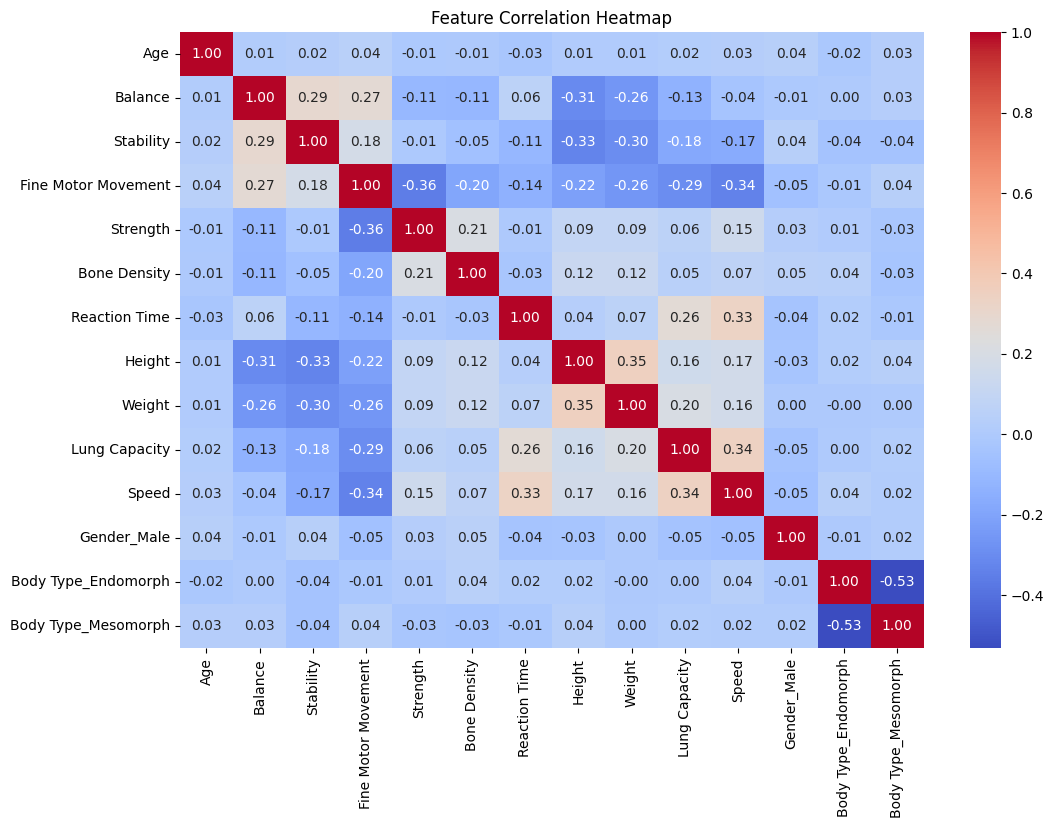

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()



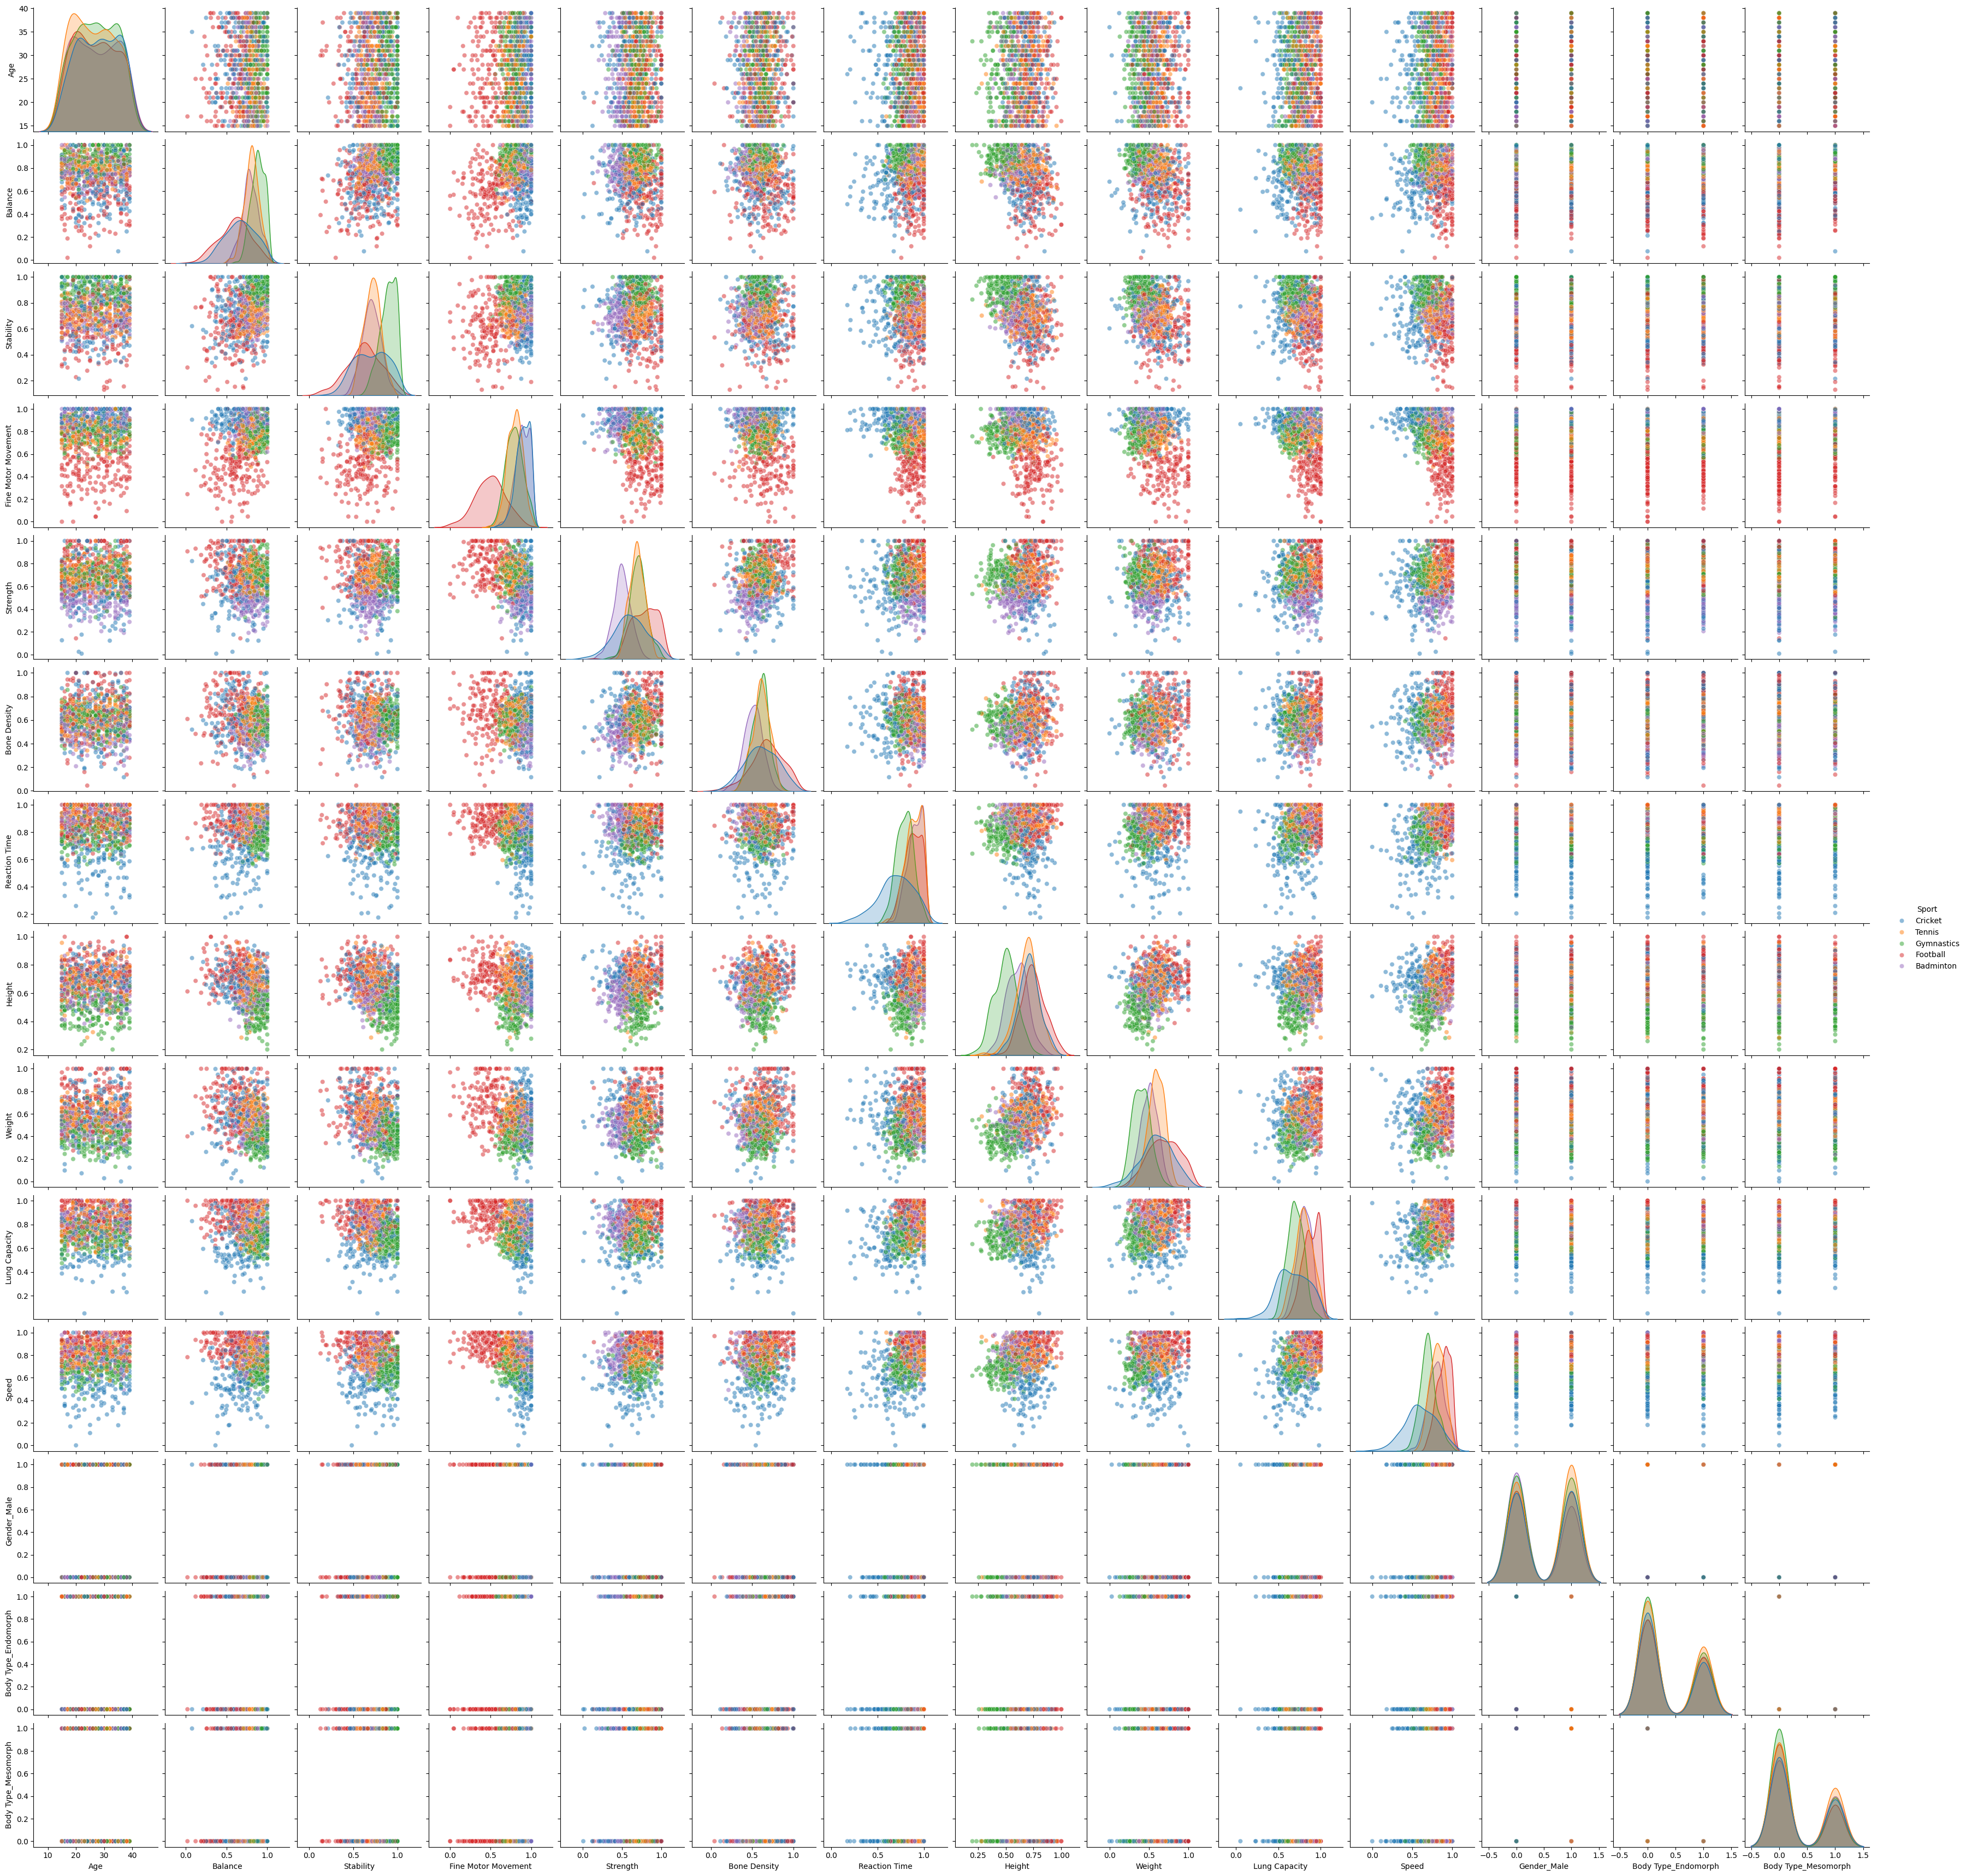

In [16]:
# Pairplot to visualize feature distribution
sns.pairplot(df_encoded, hue="Sport", diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()



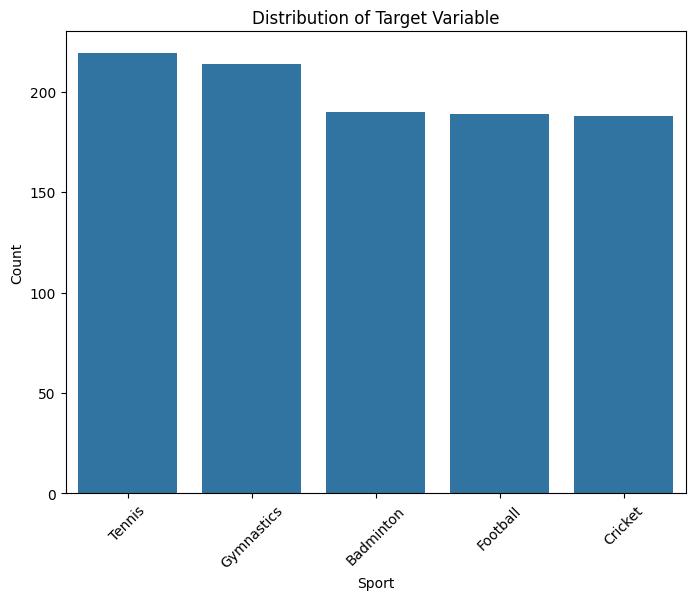

In [17]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Sport"], order=df["Sport"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Sport")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()



In [18]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))



Random Forest Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

   Badminton       0.84      0.82      0.83        38
     Cricket       0.93      1.00      0.96        37
    Football       1.00      0.84      0.91        38
  Gymnastics       0.93      0.95      0.94        43
      Tennis       0.79      0.84      0.81        44

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [19]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



XGBoost Accuracy: 0.875


c:\Users\shukl\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [01:29:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
# Feature importance analysis
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)



Feature Importances:
                 Feature  Importance
3   Fine Motor Movement    0.158818
4              Strength    0.115263
7                Height    0.113931
2             Stability    0.095986
1               Balance    0.094226
10                Speed    0.092630
8                Weight    0.088624
6         Reaction Time    0.083468
9         Lung Capacity    0.066782
5          Bone Density    0.052404
0                   Age    0.021680
11          Gender_Male    0.005690
12  Body Type_Endomorph    0.005482
13  Body Type_Mesomorph    0.005015


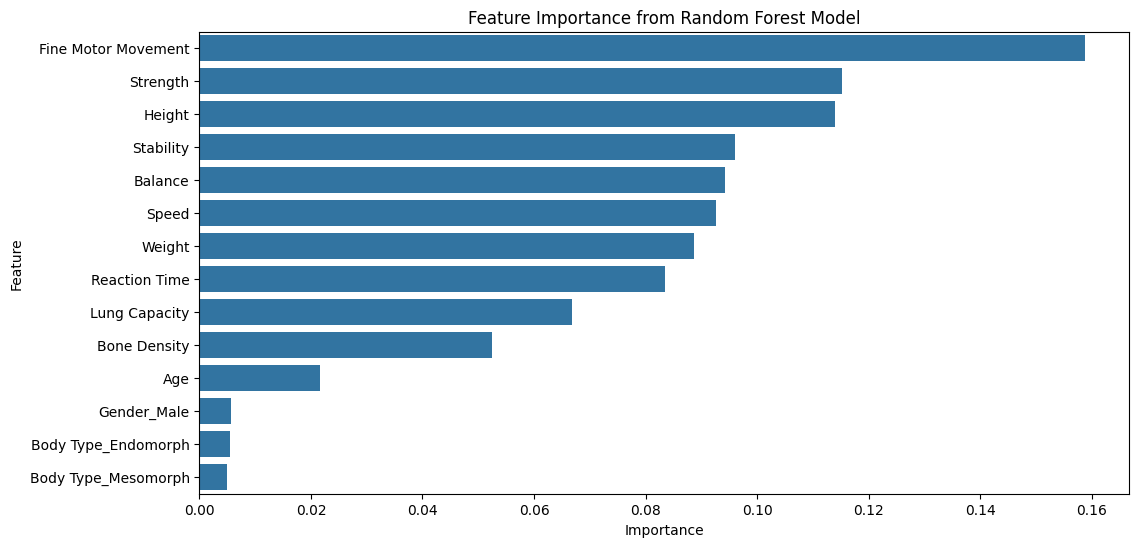

In [21]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest Model")
plt.show()



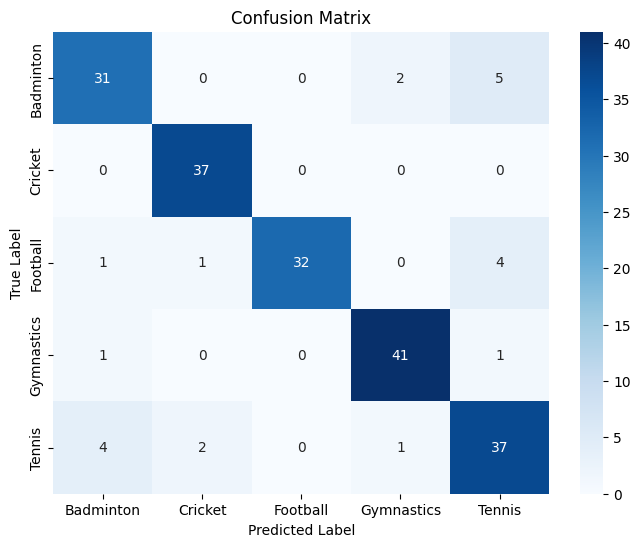

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()